## Fraud data columns
## user_id: A unique identifier for the user who made the transaction.
## signup_time: The timestamp when the user signed up.'
## purchase_time: The timestamp when the purchase was made.
## purchase_value: The value of the purchase in dollars.
## device_id: A unique identifier for the device used to make the transaction.
## source: The source through which the user came to the site (e.g., SEO, Ads).
## browser: The browser used to make the transaction (e.g., Chrome, Safari).
## sex: The gender of the user (M for male, F for female).
## age: The age of the user.
## ip_address: The IP address from which the transaction was made.
## class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.
## Critical Challenge: Class Imbalance. This dataset is highly imbalanced, with far fewer fraudulent transactions than legitimate ones. This will significantly influence your choice of evaluation metrics and modeling techniques.

# Step 1 Basic Data Exploration

In [1]:
import sys
from pathlib import Path
import pandas as pd

# Add src and scripts to path
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT / "src") not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT / "src"))
if str(PROJECT_ROOT / "scripts") not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT / "scripts"))

from eda_fraud_data import Eda
from ip_processing import transform_ip_to_country

In [2]:
# Load data
data = Eda.load_data("../data/raw/Fraud_Data.csv")

# Initialize EDA
if data is not None:
    eda = Eda(data)

Data loaded successfully from ../data/raw/Fraud_Data.csv


In [3]:

# Basic Exploration
eda.basic_exploration()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

--- Data Shape ---
(151112, 11)

--- Data Description ---
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   2

## From the data info we can see that the columns data types for signup_time and purchase_time are object. We need to convert them to datetime format for better analysis. For ip address also it needs to be converted to integer format.

In [4]:
# Convert data types
eda.convert_datetypes(['signup_time', 'purchase_time'])


--- Converting Data Types ---
Conversion successful.
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
# Check for missing values
eda.check_missing_values()


--- Missing Values ---
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
No missing values found.


## From the isna and isnull we can see that there are no missing values in the dataset.

In [6]:
# Check for unique identifiers
eda.check_unique_identifiers("user_id")


--- Checking Uniqueness for user_id ---
Unique count: 151112
Total rows: 151112
All values in 'user_id' are unique (no duplicates).


## It can also be seen that all rows have unique user_id meaning there are no duplicate rows in the dataset.

# Step 2 Exploratory Data Analysis (EDA)
## Univariate analysis: distributions of key variables
## Bivariate analysis: relationships between features and target
## Class distribution analysis: quantify the imbalance

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


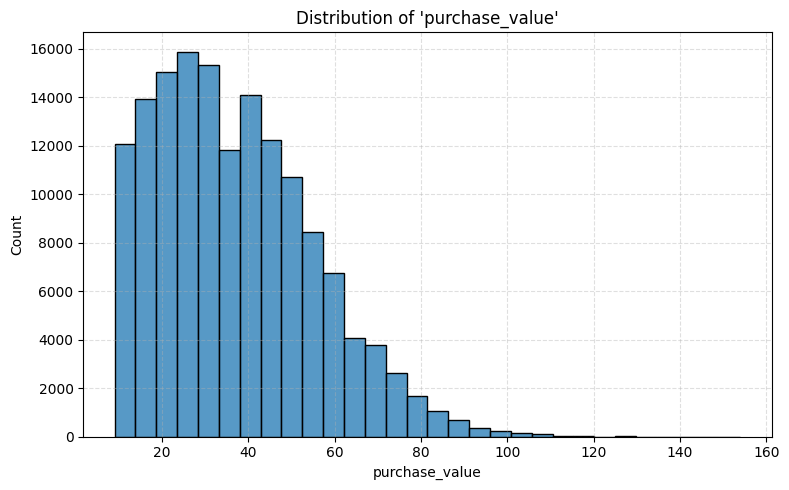

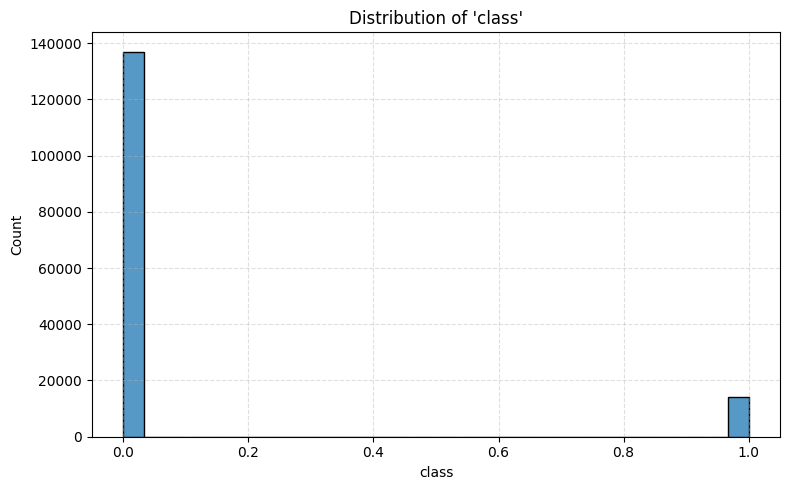

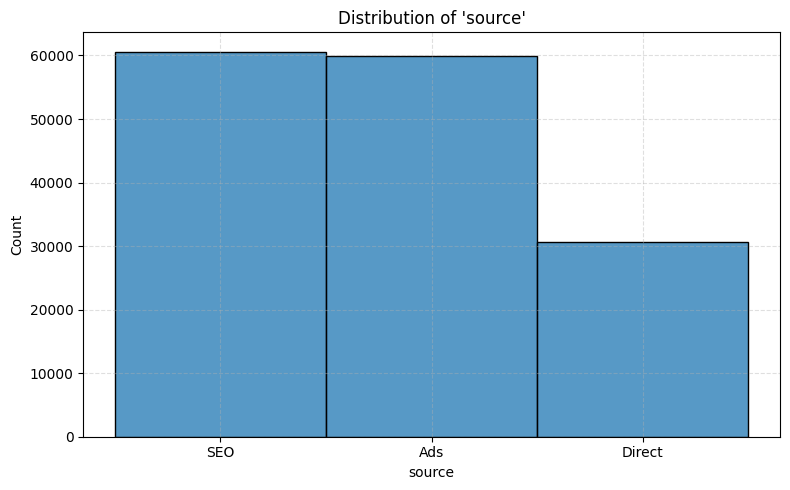

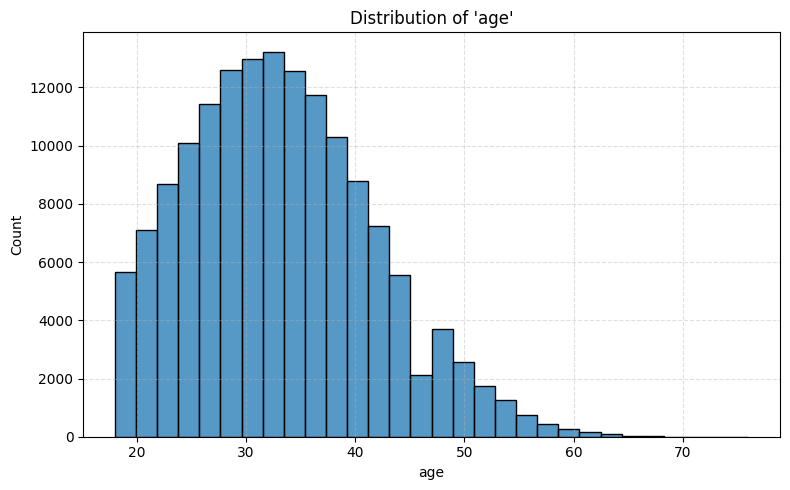

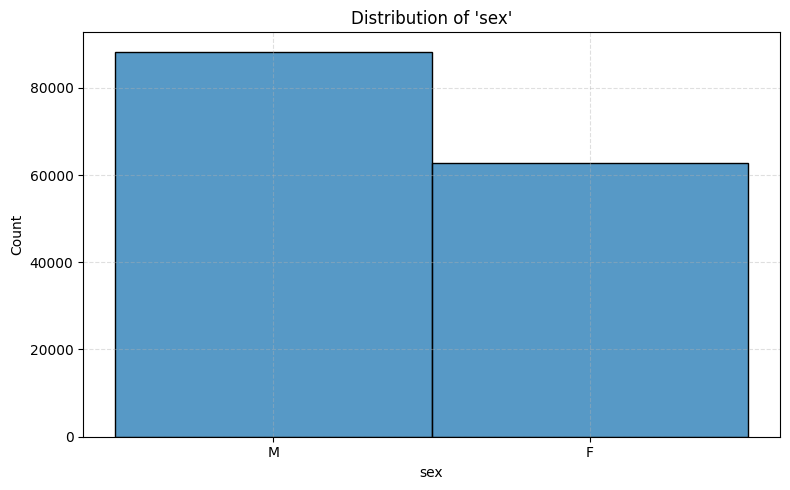

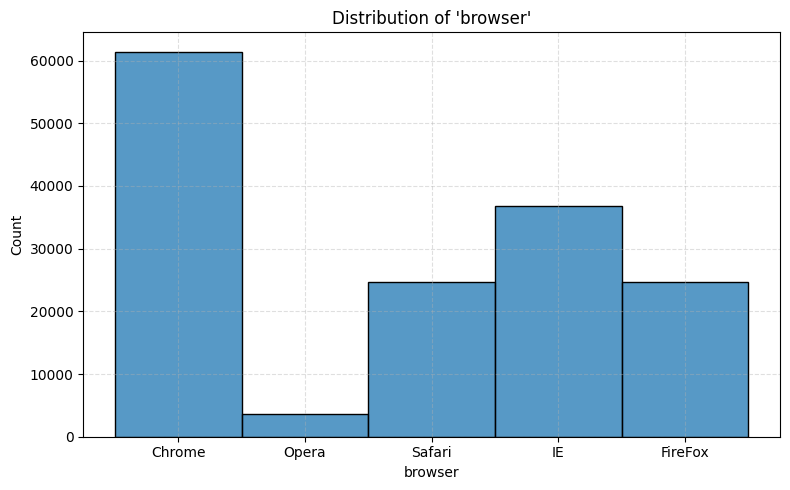

In [8]:
cols = ["purchase_value","class","source","age","sex","browser"]
for col in cols:
    eda.eda_univariate_distribution(col)

# Univariate Distribution Analysis
## The class shows a large imbalance between the two classes, with non-fraudulent transactions (class 0) being much more prevalent than fraudulent ones (class 1). This indicates that the dataset is imbalanced.
##  The purchas values also show a right-skewed distribution, with most transactions being of lower value and a few high-value transactions. This is typical in e-commerce data, where a small number of transactions account for a large portion of the total value. The histogram shows a very small number of high-value transactions especially after 80 dollars. After 100 dollars, the number of transactions is almost negligible.
## Source shows large number of users coming from SEO followed by Ads. Direct are significantly low in number.
## Age shows a normal distribution with most users being between 20 and 40 years old. There are fewer users in the older age groups
## Broswer shows most users using Chrome followed by IE. Opera is the least useed broswer

Fraud Rate by Source:

--- Statistics for source ---
        count      mean
source                 
Direct  30616  0.105370
Ads     59881  0.092066
SEO     60615  0.089285


c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


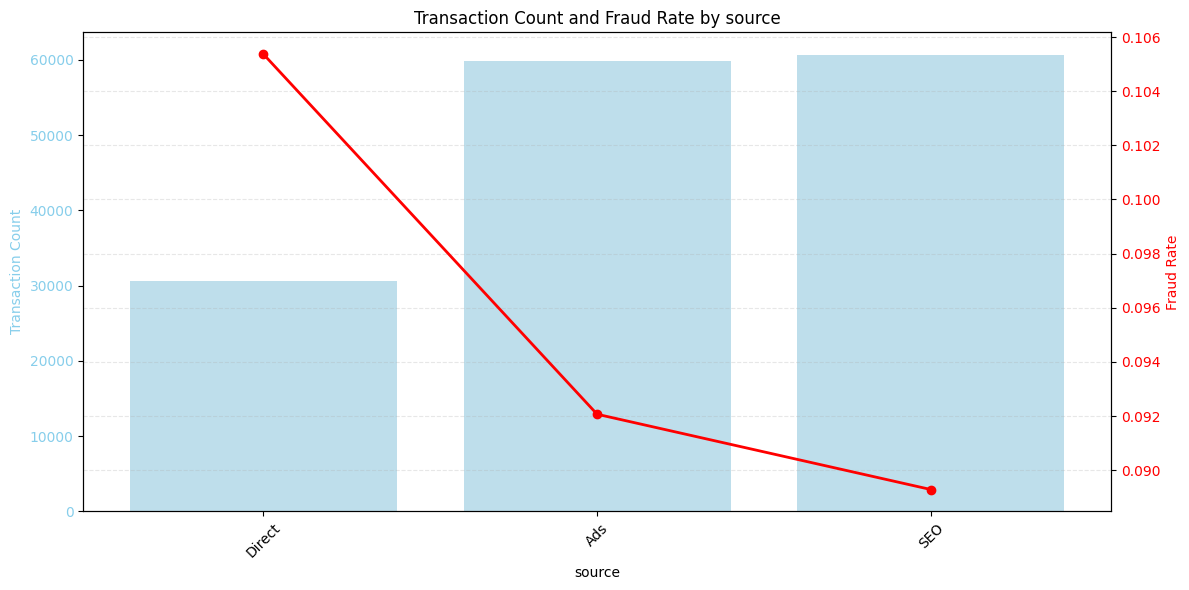

Fraud Rate by Browser:

--- Statistics for browser ---
         count      mean
browser                 
Chrome   61432  0.098792
FireFox  24610  0.095165
Safari   24667  0.090201
Opera     3676  0.089227
IE       36727  0.086775


c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


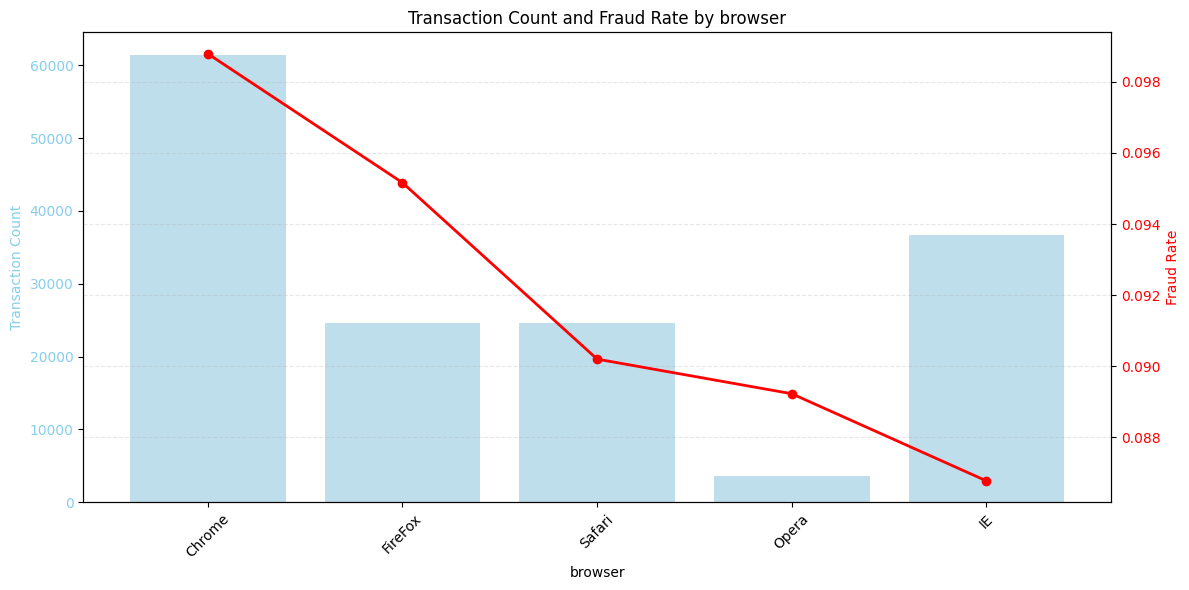

c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


Fraud Rate by Sex:

--- Statistics for sex ---
     count      mean
sex                 
M    88293  0.095523
F    62819  0.091007


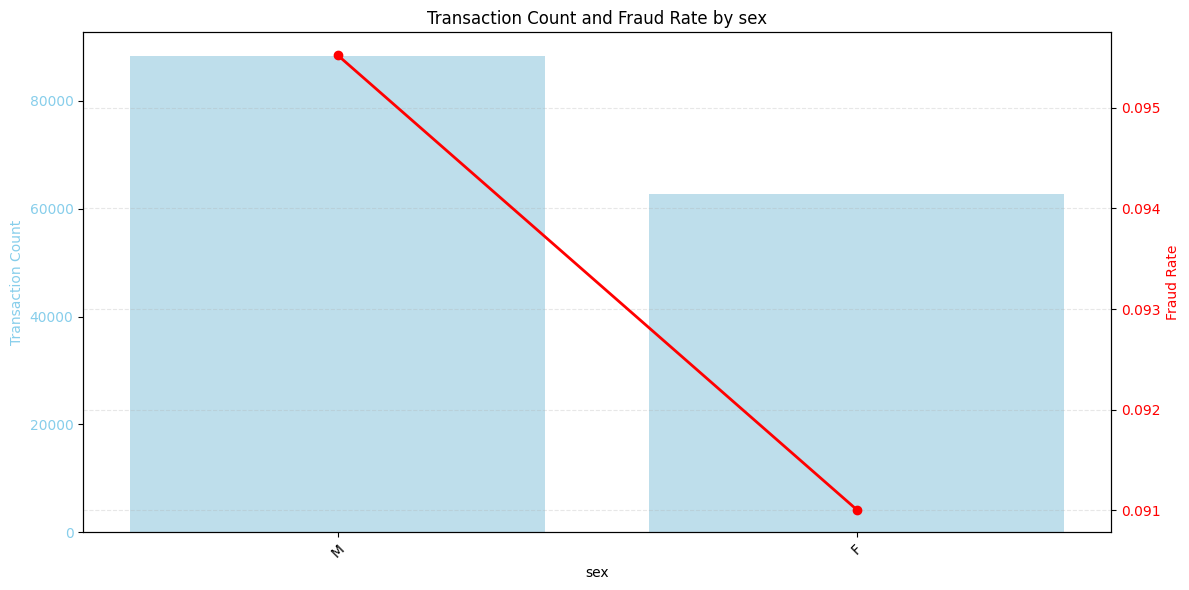

Fraud Rate vs Purchase Value:

--- Statistics for purchase_value (Binned) ---
                count      mean
purchase_value                 
(8.855, 23.5]   41057  0.097255
(23.5, 38.0]    45999  0.087611
(38.0, 52.5]    34091  0.095186
(52.5, 67.0]    20138  0.099265
(67.0, 81.5]     7247  0.088036
(81.5, 96.0]     2114  0.101703
(96.0, 110.5]     412  0.072816
(110.5, 125.0]     42  0.023810
(125.0, 139.5]     10  0.000000
(139.5, 154.0]      2  0.000000


c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:182: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = self.df.groupby(binned_series)[target].agg(['count', 'mean'])
c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


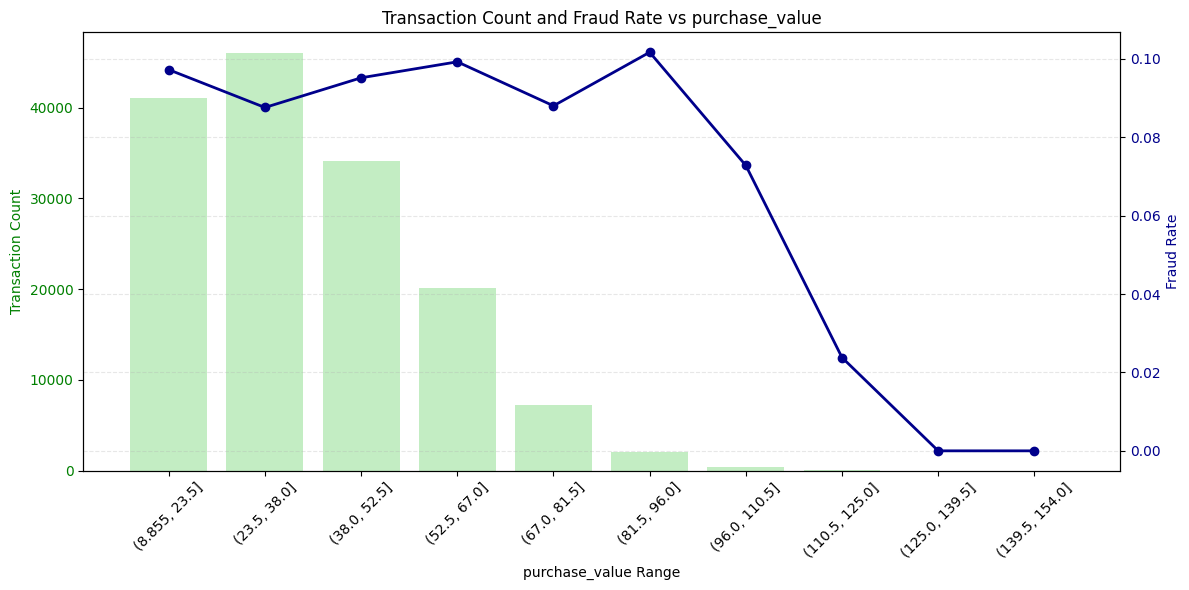

Fraud Rate vs Age:


c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:182: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = self.df.groupby(binned_series)[target].agg(['count', 'mean'])
c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)



--- Statistics for age (Binned) ---
                count      mean
age                            
(17.942, 23.8]  21453  0.092155
(23.8, 29.6]    34145  0.087656
(29.6, 35.4]    38781  0.095923
(35.4, 41.2]    30819  0.099517
(41.2, 47.0]    16916  0.090742
(47.0, 52.8]     5996  0.091227
(52.8, 58.6]     2449  0.107391
(58.6, 64.4]      491  0.093686
(64.4, 70.2]       55  0.054545
(70.2, 76.0]        7  0.000000


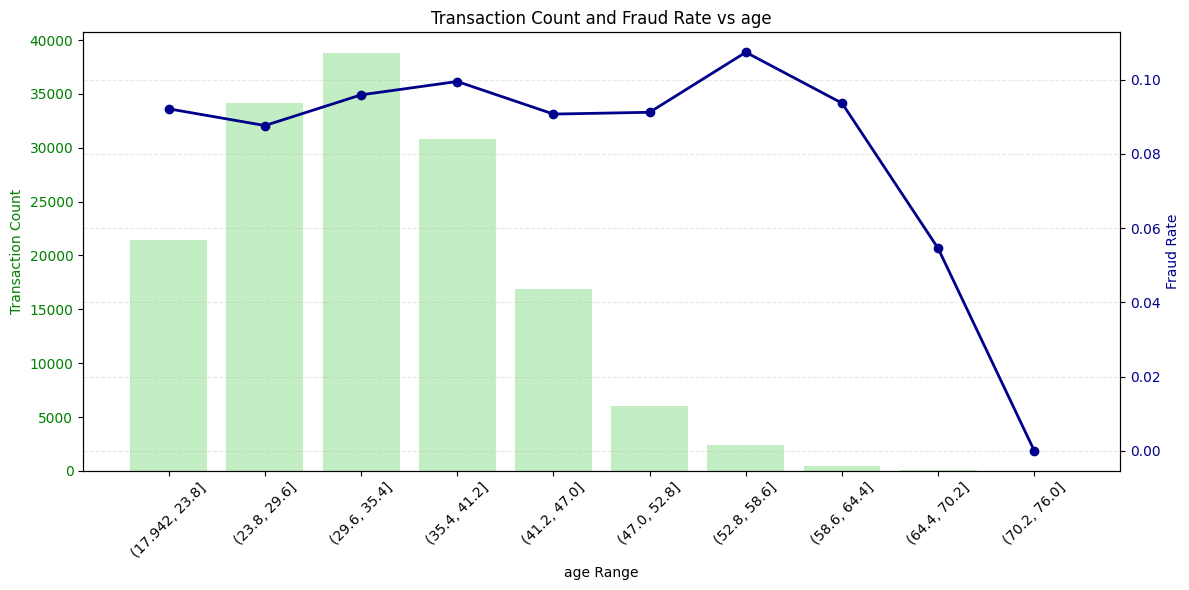

,count,mean
age,,
"(17.942, 23.8]",21453,0.092155
"(23.8, 29.6]",34145,0.087656
"(29.6, 35.4]",38781,0.095923
"(35.4, 41.2]",30819,0.099517
"(41.2, 47.0]",16916,0.090742
"(47.0, 52.8]",5996,0.091227
"(52.8, 58.6]",2449,0.107391
"(58.6, 64.4]",491,0.093686
"(64.4, 70.2]",55,0.054545


In [9]:
# Bivariate Analysis: Fraud Rate by Categorical Features
print("Fraud Rate by Source:")
eda.eda_bivariate_categorical("source")

print("Fraud Rate by Browser:")
eda.eda_bivariate_categorical("browser")

print("Fraud Rate by Sex:")
eda.eda_bivariate_categorical("sex")

# Bivariate Analysis: Fraud Rate vs Continuous Features
print("Fraud Rate vs Purchase Value:")
eda.eda_bivariate_continuous("purchase_value", bins=10)

print("Fraud Rate vs Age:")
eda.eda_bivariate_continuous("age", bins=10)

# Bivariate Analysis 
## Direct source has the highest proportion of fraudulent transactions despite having the lowest number of total transactions. This suggests that users coming directly to the site are more likely to engage in fraudulent activities compared to those coming from SEO or Ads.
##  Chrome shows the highest number of fraudulent transactions but when we look at the proportion of fraudulent transactions to total transactions, Opera and Firefox have the highest proportion of frauds despite having the lowest number of total transactions. This indicates that users using Opera and Firefox are more likely to engage in fraudulent activities compared to users using other browsers. IE showed the lowest proportion of frauds.Despite it having the second highest number of total transactions, it has the lowest proportion of fraudulent transactions. This could be due to better security features in IE or a different user demographic.

## Males have a higher number of fraudulent transactions compared to females.

##  The fraud rate is higher for purchases from $52 to 92 . The highest block is from $86-92 , it has a very little number of total transactions but a significant number of fraudulent transactions. This indicates that fraudsters may be targeting higher-value transactions within this range.

## Ages 41 to 64 shows a disproportionately higher number of fraudulent transactions compared to other age groups. Despite this group having a low transaction count  This suggests that older users may be more susceptible to fraud or that fraudsters are targeting this demographic more heavily.

## Class Imbalance
## The dataset is highly imbalanced, with a significantly larger number of non-fraudulent transactions

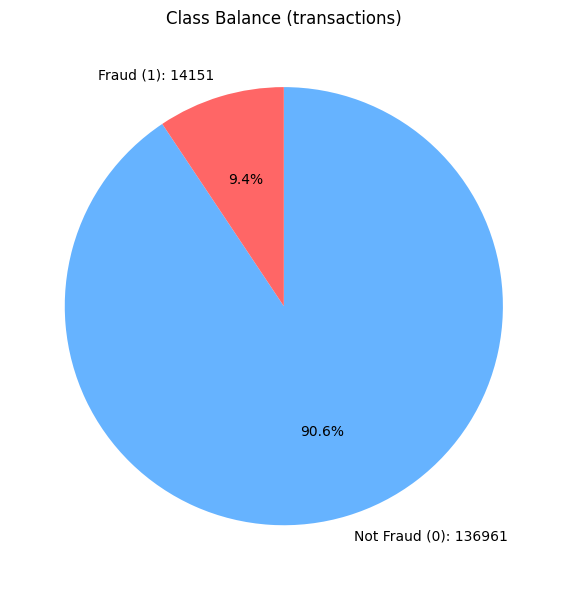


Class counts:
 class
0    136961
1     14151
Name: count, dtype: int64


In [10]:
# Plot class balance (fraud vs not fraud)
counts = eda.plot_class_balance()
print('\nClass counts:\n', counts)

## Step 3 -IP Processing

In [11]:
ip_data = Eda.load_data("../data/raw/IpAddress_to_Country.csv")

# Initialize EDA
if ip_data is not None:
    ip_eda = Eda(ip_data)

Data loaded successfully from ../data/raw/IpAddress_to_Country.csv


In [12]:
ip_eda.basic_exploration()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None

--- Data Shape ---
(138846, 3)

--- Data Description ---
       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215e+08            8.974979e+08
min              1.677722e+07            1.677747e+07
25%              1.919930e+09            1.920008e+09
50%              3.230887e+09            3.230888e+09
75%              3.350465e+09            3.350466e+09
max              3.758096e+09            3.75

In [13]:
ip_eda.check_missing_values()


--- Missing Values ---
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
No missing values found.


### we can see that the from the basic data exploration that the IpAddress_to_Country data has no missing values but the  lower_bound_ip_address needs to be converted to an int64- it is a float64 currently.

   ip_address  country
0       52093  Unknown
1       93447  Unknown
2      105818  Unknown
3      117566  Unknown
4      131423  Unknown
Fraud Rate by Country:

--- Statistics for country ---
                                 count      mean
country                                         
Mexico                            1121  0.128457
Sweden                            1090  0.120183
Canada                            2975  0.116975
India                             1310  0.115267
United Kingdom                    4490  0.106236
Japan                             7306  0.097865
United States                    58049  0.095626
France                            3161  0.094907
Korea Republic of                 4162  0.091302
Brazil                            2961  0.091185
Australia                         1844  0.089479
South Africa                       838  0.088305
China                            12038  0.086642
Unknown                          21966  0.085723
Italy                  

c:\Users\yeget\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\src\eda_fraud_data.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


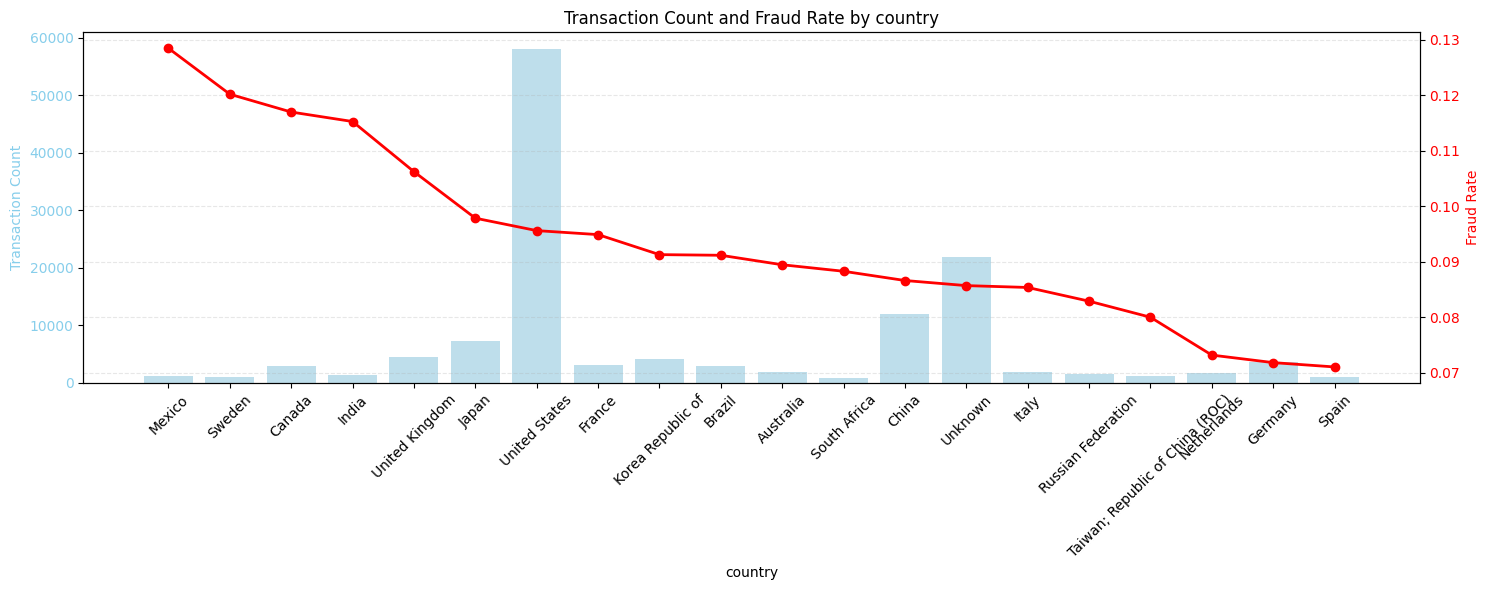

,count,mean
country,,
Mexico,1121,0.128457
Sweden,1090,0.120183
Canada,2975,0.116975
India,1310,0.115267
United Kingdom,4490,0.106236
Japan,7306,0.097865
United States,58049,0.095626
France,3161,0.094907
Korea Republic of,4162,0.091302


In [14]:
# Map IP addresses to countries
# Note: This function handles the int64 conversion internally
data_with_country = transform_ip_to_country(data, ip_data)

# Update EDA instance with new data containing 'country' column
eda_merged = Eda(data_with_country)

# Display first few rows to verify country column
print(data_with_country[['ip_address', 'country']].head())

# Bivariate Analysis: Fraud Rate by Country
print("Fraud Rate by Country:")
# We use the top 20 countries by transaction count to avoid cluttering the plot with rare countries
top_countries = data_with_country['country'].value_counts().nlargest(20).index.tolist()

# Filter data for plotting
data_top_20 = data_with_country[data_with_country['country'].isin(top_countries)]
eda_top_20 = Eda(data_top_20)

eda_top_20.eda_bivariate_categorical("country", figsize=(15, 6))

# Country fraud analysis interpretation

## 1.  High Risk, Low Volume (The "Red Flags")
## Mexico, Sweden, Canada, India: These countries are on the far left.
## Observation: They have very low blue bars (low transaction count) but the highest red points (highest fraud rates, around 11-13%).
## Interpretation: Even though you don't get many customers from these countries, the ones you do get are disproportionately likely to be fraudsters. This suggests targeted attacks or specific fraud rings operating from these locations.
## Action: You might want to implement stricter rules for these specific countries (e.g., manual review for all transactions from Mexico or Sweden).

## 2. The "Safe" Giant (United States)
## Observation: The US has a massive blue bar (huge volume, ~58k transactions) but a moderate-to-low fraud rate (around 9.5%).
## Interpretation: This is your main market. While the rate is lower, the sheer volume means the highest number of fraud cases probably still comes from the US.
## Action: You can't just block the US. You need more subtle models here (using features like device ID, browser, etc.) to separate the good from the bad.

## 3. The "Middle Pack" (France, Korea, Brazil, Australia, South Africa)
## These countries sit in the middle of your graph.

## Observation: They have moderate transaction volumes and fraud rates that hover around the average (approx. 9%).
## Interpretation: These are "standard" markets. They don't show the extreme risk of Mexico/Sweden, nor the safety of Germany/Spain.

## 3. Low Risk, Low Volume (The "Safe" Tail)
## Germany, Spain, Netherlands: These are on the far right.
## Observation: Low volume and the lowest fraud rates (around 7%).
## Interpretation: These are currently your safest international markets.

In [15]:
# let's see the newly merged eda instance info 
eda_merged.basic_exploration()
#let's check for missing values again
eda_merged.check_missing_values()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 13.8+ MB
None

--- Data Shape ---
(151112, 12)

--- Data Description

## From the basic exploration of the merged data we can see that the country column is now added to the original data. The ip address is also  converted to int64 format. There are also no missing values in any of the columns. However we do have some unknown countries which means that some ip addresses in the original data did not find a match in the ip mapping data. This is expected as the ip mapping data may not cover all possible ip addresses.

In [16]:
(data_with_country['country']=='Unknown').value_counts()

country
False    129146
True      21966
Name: count, dtype: int64